In [14]:
pip install imblearn
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_labeling = pd.read_csv('labeling_dataset.csv')

In [5]:
df_labeling

,textDisplay,clear,translate,label,score,polarity,subjectivity
0,Semoga terwujud Aamiim presiden,semoga terwujud aamiim presiden,Hopefully the Presidential Aamiim will be real...,Netral,0,0.000,0.000000
1,MANTAPPPP,mantapppp,MANTAPPPP,Netral,0,0.000,0.000000
2,"Anies cocok jadi Presiden 8<br>Ganteng, amana...",anies cocok jadi presiden ganteng amanah pinta...,Anies is suitable to be a handsome president o...,Positif,1,0.525,0.725000
3,jujur demi Allah biarkan kalian mengoceh yang ...,jujur allah biarkan kalian mengoceh jadi presi...,Honestly Allah let you blabber in becoming pre...,Positif,1,0.525,0.875000
4,Sy dukung prabowa krn wakilnya bkan saatnya sk...,sy dukung prabowa krn wakilnya bkan saatnya sk...,I support Prabowa because the representatives ...,Positif,1,0.200,0.366667
...,...,...,...,...,...,...,...
132767,"Woo...woo , ditipu berkali kali kok masih perc...",woowoo ditipu berkali kali kok percaya sih mikir,Woowoo was cheated many times why I believe in...,Positif,1,0.500,0.500000
132768,"Hoax lagi.....................<a href=""about:i...",hoax,Hoax,Netral,0,0.000,0.000000
132769,"Nggak salah kok pak, biar sama-sama nyungsep n...",salah kok pak biar samasama nyungsep nantinya,"It's wrong, sir, so that you can work together...",Negatif,-1,-0.250,0.450000
132770,Amin,amin,Amen,Netral,0,0.000,0.000000


In [65]:
X = df_labeling['textDisplay']
Y = df_labeling['score']

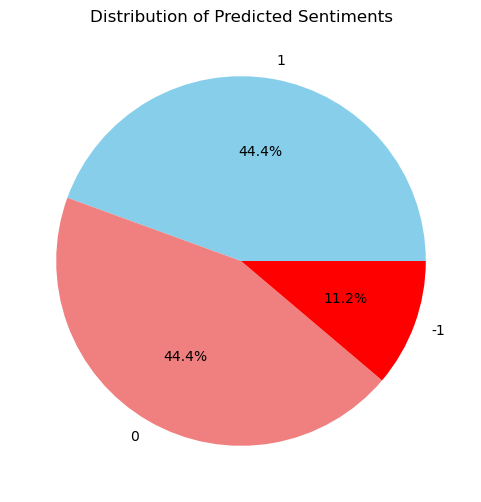

In [67]:
# Hitung distribusi hasil prediksi
prediction_distribution = pd.DataFrame({'Predicted': Y})
prediction_counts = prediction_distribution['Predicted'].value_counts()

# Visualisasi Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral','red'])
plt.title('Distribution of Predicted Sentiments')
plt.show()

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [46]:
vectorizer = CountVectorizer()

tfidf_train_vectors = vectorizer.fit_transform(X_train) 
tfidf_test_vectors = vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % tfidf_train_vectors.shape)


n_samples: 106217, n_features: 67064


In [47]:
#model training and prediction

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tfidf_train_vectors, Y_train)

MultinomialNB()

In [48]:
Y_pred = naive_bayes_classifier.predict(tfidf_test_vectors)
print(classification_report(Y_test, Y_pred)) #model evaluation

              precision    recall  f1-score   support

          -1       0.61      0.30      0.41      2953
           0       0.80      0.72      0.76     11732
           1       0.69      0.85      0.76     11870

    accuracy                           0.73     26555
   macro avg       0.70      0.62      0.64     26555
weighted avg       0.73      0.73      0.72     26555



In [49]:
# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

In [73]:
# Tampilkan hasil
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.7304085859536811

Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.30      0.41      2953
           0       0.80      0.72      0.76     11732
           1       0.69      0.85      0.76     11870

    accuracy                           0.73     26555
   macro avg       0.70      0.62      0.64     26555
weighted avg       0.73      0.73      0.72     26555



<Axes: >

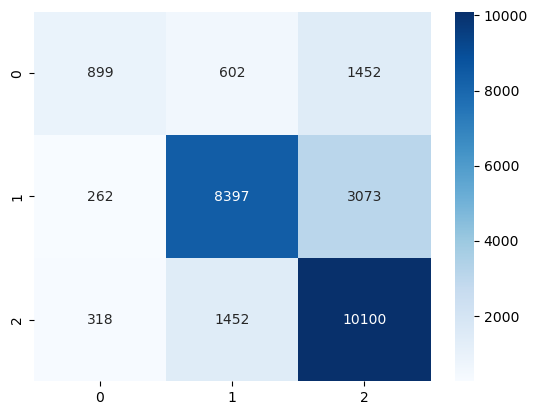

In [51]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = '', cmap = 'Blues')

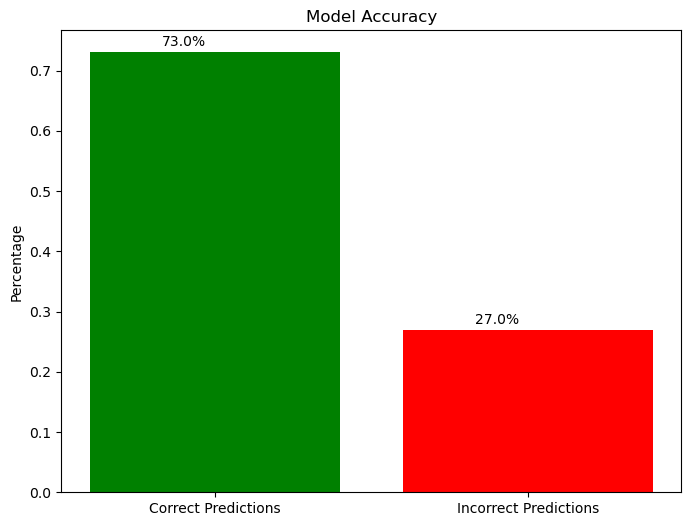

In [74]:
# ...

# Visualisasi Bar Chart untuk Akurasi Model dengan Keterangan Angka
accuracy_values = [accuracy, 1 - accuracy]
labels = ['Correct Predictions', 'Incorrect Predictions']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracy_values, color=['green', 'red'])

# Tambahkan keterangan angka di atas setiap bar
for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value*100:.1f}%', ha='center', color='black')

plt.title('Model Accuracy')
plt.ylabel('Percentage')
plt.show()


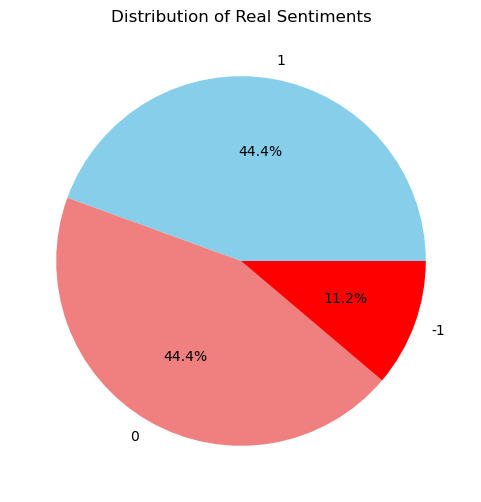

In [77]:
# Hitung distribusi hasil prediksi
prediction_distribution = pd.DataFrame({'Real': Y})
prediction_counts = prediction_distribution['Real'].value_counts()

# Visualisasi Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral','red'])
plt.title('Distribution of Real Sentiments')
plt.show()

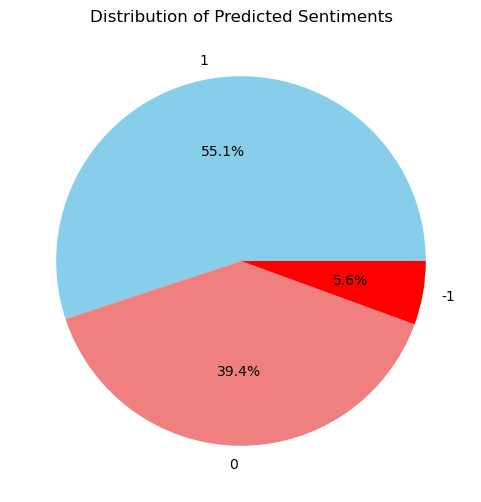

In [55]:
# Hitung distribusi hasil prediksi
prediction_distribution = pd.DataFrame({'Predicted': Y_pred})
prediction_counts = prediction_distribution['Predicted'].value_counts()

# Visualisasi Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral','red'])
plt.title('Distribution of Predicted Sentiments')
plt.show()

Simpan model dan vektorisasi

In [25]:
import pickle

In [161]:
with open('modelNB.pickle', 'wb') as file:
    pickle.dump(naive_bayes_classifier, file)

In [33]:
with open('vectorizer.pickle', 'wb') as file:
    pickle.dump(vectorizer, file)

In [28]:
with open('modelNB.pickle', 'rb') as file:
    unpickled_model = pickle.load(file)

In [29]:
with open('vectorizer.pickle', 'rb') as file:
    unpickled_vektorisasi = pickle.load(file)

In [69]:
new_text = ["Saatnya tenggelamkan PDIP"]
new_text_vectorized = unpickled_vektorisasi.transform(X)

In [70]:
new_prediction = unpickled_model.predict(new_text_vectorized)

In [71]:
new_prediction

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)